In [1]:
ls

Untitled.ipynb
YNU.EDU2018-ScenicWord/
YNU.EDU2018-ScenicWord.zip
YNU.EDU2018-ScenicWord_submite_sample.csv


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [3]:
data_path = './YNU.EDU2018-ScenicWord/train_first.csv'

df = pd.read_csv(data_path,header = 0, encoding='utf8')

In [4]:
df.head()

,Id,Discuss,Score
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,好大的一个游乐公园，已经去了2次，但感觉还没有玩够似的！会有第三，第四次的,5
1,f4d51947-eac4-3005-9d3c-2f32d6068a2d,新中国成立也是在这举行，对我们中国人来说有些重要及深刻的意义！,4
2,74aa7ae4-03a4-394c-bee0-5702d3a3082a,庐山瀑布非常有名，也有非常多个瀑布，只是最好看的非三叠泉莫属，推荐一去,4
3,099661c2-4360-3c49-a2fe-8c783764f7db,个人觉得颐和园是北京最值的一起的地方，不过相比下门票也是最贵的，比起故宫的雄伟与气势磅礴，颐...,5
4,97ca672d-e558-3542-ba7b-ee719bba1bab,迪斯尼一日游,5


In [5]:
len(df)

100000

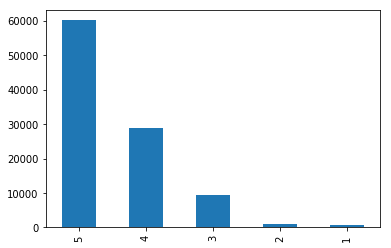

In [6]:
df['Score'].value_counts().plot(kind='bar')

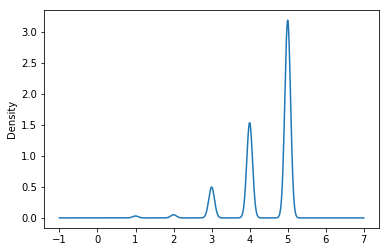

In [7]:
df['Score'].plot(kind='kde')

In [8]:
df[df['Score']==1].head(10)

,Id,Discuss,Score
192,52b057ed-a885-3f3e-8c42-cdc2197f8d02,1.31订票总数6张计划2.1去黄山风景区票，共定6张票，三张学生票与三张成人票，因计划有变...,1
229,80e3560c-eb9f-39b3-bc32-840af9343c7d,不值\',1
239,1e727667-3961-372a-ae61-f0a7ce1874e5,最不愿意提起的景区,1
381,9edee53c-e328-3367-a6b5-b82e27b862a5,由于是跟团去的，旅行社统一订的票，而且正好赶上8/20第一天试运营，大排长龙的场景可想而知。...,1
413,46ea7b32-0dc5-3322-8bf0-8936da458fa1,一个字 破 千万不要在上面吃东西 卫生差 而且还贵,1
606,870cd4ac-ec0d-360d-8681-1e48bd062f49,影响心情,1
1111,21a75f0d-513a-39a5-96b7-3ec82e0e9879,太坑了，5月2日竟然不开放，白排了两个小时队，没进去景区，停车场还收费，光出停车场就用了半个...,1
1166,3e5cfd25-ee4c-33af-bf39-b8a8fbe7b68c,这个世界遗产，国家5A级景区几乎是最令我失望的一个了，而且今天还是我时隔几年后的第二次参观。...,1
1465,728eb490-a4a3-3ff2-a2a0-0224629340ea,整个景区就象个菜市场,1
1501,fea8f6cd-f3ba-3f3a-b8b4-41420bff281b,里面什么都没有，在329级台阶之后就只有一个有着孙中山先生雕像的陵墓，,1


In [64]:
list(jieba.cut('国家四星级旅游景区'))
stri = '国家AAAA级旅游景区'
stri = re.sub(r'[A]+','星级',stri.strip())
stri

'国家星级级旅游景区'

In [9]:
test_data_path = './YNU.EDU2018-ScenicWord/predict_first.csv'

test_df = pd.read_csv(test_data_path,header = 0, encoding='utf8')

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [12]:
lens = df.Discuss.str.len()
lens.mean(), lens.std(), lens.max()

(48.2835, 78.52227750918834, 1336)

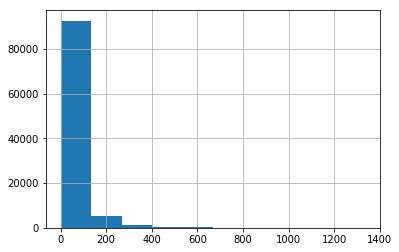

In [13]:
lens.hist();

In [47]:
test_lens = test_df.Discuss.str.len()
test_df['lens'] = test_lens

In [46]:
df['lens'] = lens
df['lens'].describe()

count    83992.000000
mean        53.964854
std         82.434277
min          1.000000
25%         15.000000
50%         28.000000
75%         60.000000
max       1336.000000
Name: lens, dtype: float64

In [48]:
test_df['lens'].describe()

count    30000.0000
mean        40.6087
std         64.5186
min          0.0000
25%          8.0000
50%         20.0000
75%         44.0000
max        999.0000
Name: lens, dtype: float64

In [49]:
dis = df.loc[df['lens']==1,'Discuss'].tolist()

In [54]:
df.loc[df['lens']==1,:]

,Id,Discuss,Score,lens
7,bf13ec92-6079-3451-ade3-88020cb0dcb5,赞,5,1
86,5739b639-ef22-3593-b98d-f1bebe4d03bb,,5,1
230,461c3f63-b714-3983-8b6c-3fa307686cca,累,4,1
791,e1a5ea97-4131-3ad1-8749-dbd780ee9f6f,棒,5,1
1359,21fe9f64-63e5-3215-97d7-02e88b920cfa,,5,1
1382,f06668fa-81c1-3369-b883-be853620d544,美,4,1
1438,ca20c99e-0a45-3793-8bc5-5c1911e7c00f,爽,5,1
1626,634bfb80-ac75-31d1-bc49-d2fbca2598a2,酷,5,1
3468,930fc14f-a9c9-32b8-a643-a3ced118e132,,5,1
4101,727647f8-57dd-31c7-87ce-0072e9c7aab0,,3,1


In [56]:
len(test_df['Id'].unique())

30000

In [14]:
stop_word = []
stop_words_path = 'stopWordList.txt'
with open(stop_words_path,encoding='utf8') as f:
    for line in f.readlines():
        stop_word.append(line.strip())
stop_word.append(' ')

In [15]:
import jieba
import re
def clean_str(stri):
    stri = re.sub(r'[a-zA-Z0-9]+','',stri)
    cut_str = jieba.cut(stri)
    list_str = [word for word in cut_str if word not in stop_word]
    stri = ' '.join(list_str)
    return stri

In [16]:
df.drop_duplicates(subset='Discuss', keep='first',inplace=True)

In [17]:
len(df)

83992

In [18]:
df['Discuss'] = df['Discuss'].map(lambda x : clean_str(x))
test_df['Discuss'] = test_df['Discuss'].map(lambda x : clean_str(x))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/s5/cxqfsb816f36h8gp706x5kjm0000gn/T/jieba.cache
Loading model cost 1.081 seconds.
Prefix dict has been built succesfully.


In [19]:
df.head()

,Id,Discuss,Score
0,201e8bf2-77a2-3a98-9fcf-4ce03914e712,好大 游乐 公园 次 感觉 玩够 第三 第四次,5
1,f4d51947-eac4-3005-9d3c-2f32d6068a2d,新 中国 成立 中国 深刻 意义,4
2,74aa7ae4-03a4-394c-bee0-5702d3a3082a,庐山 瀑布 有名 多个 瀑布 好看 非 三叠 泉莫属 推荐 一去,4
3,099661c2-4360-3c49-a2fe-8c783764f7db,颐和园 北京 最值 地方 相比 门票 最贵 故宫 雄伟 气势磅礴 颐和园 宁静 波光粼粼 美,5
4,97ca672d-e558-3542-ba7b-ee719bba1bab,迪斯尼 一日游,5


In [20]:
n = df.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2),min_df=3, max_df=0.9, use_idf=1,smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(df['Discuss'])
test_term_doc = vec.transform(test_df['Discuss'])

In [21]:
trn_term_doc, test_term_doc

(<83992x72943 sparse matrix of type '<class 'numpy.float64'>'
 	with 1188804 stored elements in Compressed Sparse Row format>,
 <30000x72943 sparse matrix of type '<class 'numpy.float64'>'
 	with 365857 stored elements in Compressed Sparse Row format>)

In [27]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from scipy import sparse
class NbSvmClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, dual=False, n_jobs=1):
        self.C = C
        self.dual = dual
        self.n_jobs = n_jobs

    def predict(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict(x.multiply(self._r))

    def predict_proba(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict_proba(x.multiply(self._r))

    def fit(self, x, y):
        # Check that X and y have correct shape
        y = y.values
        x, y = check_X_y(x, y, accept_sparse=True)

        def pr(x, y_i, y):
            p = x[y==y_i].sum(0)
            return (p+1) / ((y==y_i).sum()+1)

        self._r = sparse.csr_matrix(np.log(pr(x,1,y) / pr(x,0,y)))
        x_nb = x.multiply(self._r)
        self._clf = LogisticRegression(C=self.C, dual=self.dual, n_jobs=self.n_jobs).fit(x_nb, y)
        return self

In [38]:
model = NbSvmClassifier(C=4, dual=True, n_jobs=-1).fit(trn_term_doc,df['Score'])

/Users/wangle/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


In [39]:
pred = model.predict_proba(test_term_doc)
pred = get_predict(pred)
test_df['Score3'] = pred

In [82]:
test_df['Score3'] = pred
sub_data = test_df[['Id','Score3']]
sub_data.to_csv('sub3.csv',header=None,index=False)

In [83]:
test_df['Score2'].describe()

count    30000.000000
mean         4.449839
std          0.577546
min          1.000000
25%          4.060000
50%          4.620000
75%          5.000000
max          5.000000
Name: Score2, dtype: float64

In [22]:
def get_predict(pred):
    score = np.array([1,2,3,4,5])
    pred2 = []
    for p in pred:
        pr = np.sum(p * score)
        pred2.append(round(pr,2))
    return np.array(pred2)

In [30]:
def rmsel(true_label,pred):
    true_label = np.array(true_label)
    pred = np.array(pred)  
    n = len(true_label)
    a = true_label - pred
    rmse = np.sqrt(np.sum(a * a)/n)
    b = 1/(1+rmse)
    return b

In [25]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import StratifiedShuffleSplit

In [31]:
clf = MultinomialNB()
X = trn_term_doc
y = df['Score'].values
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=3)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    X_train, X_test = X_train.toarray(), X_test.toarray()
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train,y_train)
    pred_i = clf.predict_proba(X_test)
    pred_i = get_predict(pred_i)
    print(rmsel(y_test,pred_i))

0.571626400442
0.572019582215
0.571727108892
0.572622077741
0.572127754907


In [28]:
clf = LogisticRegression(C=4, dual=True, n_jobs=-1)
X = trn_term_doc
y = df['Score'].values
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=3)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    X_train, X_test = X_train.toarray(), X_test.toarray()
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train,y_train)
    pred_i = clf.predict_proba(X_test)
    pred_i = get_predict(pred_i)
    print(rmsel(y_test,pred_i))

/Users/wangle/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.0108159018056
0.0108085497946
0.0108006587082
0.0108813453395
0.0108360927069


In [32]:
clf = MultinomialNB()
X = trn_term_doc
y = df['Score'].values

clf.fit(X,y)
pred_i = clf.predict_proba(test_term_doc)

In [35]:
pred_i = get_predict(pred_i)
test_df['Score2'] = pred_i
sub_data = test_df[['Id','Score2']]
sub_data.to_csv('sub4.csv',header=None,index=False)

In [42]:
test_df[['Score','Score2','Score3']].describe()

,Score,Score2,Score3
count,30000.000000,30000.000000,30000.000000
mean,4.451419,4.608339,4.423727
std,0.492803,0.209983,0.557432
min,1.351500,2.720000,1.110000
25%,4.126500,4.470000,4.060000
50%,4.623000,4.630000,4.620000
75%,4.848500,4.770000,4.870000
max,5.000000,5.000000,5.000000


In [41]:
test_df['Score'] = 0.15*test_df['Score2'] + 0.85*test_df['Score3']

In [43]:
sub_data = test_df[['Id','Score']]
sub_data.to_csv('sub4.csv',header=None,index=False)